In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import roc_auc_score as auc
#from sklearn.metrics import plot_confusion_matrix as pcm
#from sklearn.metrics import plot_precision_recall_curve as ppc
#from sklearn.metrics import plot_roc_curve as prc
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.model_selection import cross_val_score as cv
from sklearn.svm import LinearSVC as linSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import fbeta_score
from sklearn.model_selection import StratifiedKFold
import pandas as pd
from matplotlib import pyplot as plt  
import numpy as np
from sklearn.preprocessing import Normalizer as norm
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.utils.class_weight import compute_class_weight
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.cluster import MeanShift
from sklearn.neural_network import MLPClassifier

In [2]:
#loading data
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
y_train = y_train['Expected']
y_test = pd.read_csv('y_test_pred_dectree_md2.csv')
X_test = pd.read_csv('X_test.csv')
y_test = y_test['Predicted']
df = X_train

In [3]:
def prep_func(df):
    df_noId = df.drop(['Id'], axis=1)
    sparse_attributes = ['ab_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'cr_000']
    histo_features = ['ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'cn_000', 'cn_001', 'cn_002', 'cn_003', 'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008', 'cn_009', 'cs_000', 'cs_001', 'cs_002', 'cs_003', 'cs_004', 'cs_005', 'cs_006', 'cs_007', 'cs_008', 'cs_009', 'ee_000', 'ee_001', 'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009']
    histo_dic = {'histo_ag':['ag_000','ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009'], 'histo_ay':['ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009'], 'histo_az':['az_000','az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009'],'histo_ba':['ba_000','ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009'],'histo_cn':['cn_000','cn_001', 'cn_002', 'cn_003', 'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008', 'cn_009'],'histo_cs' :['cs_000','cs_001', 'cs_002', 'cs_003', 'cs_004', 'cs_005', 'cs_006', 'cs_007', 'cs_008', 'cs_009'],'histo_ee': ['ee_000','ee_001', 'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009']}
    
    df_lessAtt = df_noId.drop(sparse_attributes, axis=1)
    new_atts_ordinal=[]
    
    for i in histo_dic:  
        #att1=df[histo_dic[i]].max(axis=1)
        att2=df[histo_dic[i]].idxmax(axis="columns")

        #name1 = i + '_val'
        name2 = i + '_mode'
        #se1 = pd.Series(att1)
        se2 = pd.Series(att2)
        #df_lessAtt[name1] = se1.values
        df_lessAtt[name2] = se2.values
        new_atts_ordinal.append(name2)
    
    df_lessAtt[new_atts_ordinal] = df_lessAtt[new_atts_ordinal].fillna('000')
    
    for i in new_atts_ordinal:
        ss=[]
        for j in range(len(df_lessAtt)):
            s=df_lessAtt[i].loc[j][-1]
            ss.append(s)
        df_lessAtt[i]=ss
    
    #df_noHisto = df_lessAtt.drop(histo_features, axis=1)
    
    df_imp1=df_lessAtt.fillna(df_lessAtt.iloc[:,0:92].mean())
    df_imp2 = df_imp1.fillna(0)
    df_f = df_imp2
    return df_f

In [4]:
X_train_p = prep_func(X_train)

In [5]:
X_test_p = prep_func(X_test)

In [24]:
X_trainS, X_testS, y_trainS, y_testS = train_test_split(X_train_p, y_train, test_size=0.33, random_state=42)

In [25]:
scores_NoScaler = []
scores_StandardScaler = []
scores_MinMaxScaler = []

In [11]:
#GNB (not much difference with or without scaler)
clf = GaussianNB()
pipe = make_pipeline( clf)
it = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(clf, X_train_p, y_train, cv=it, scoring = fthree_scorer)
print(cv_results)

[0.76380729 0.77818627 0.76470588 0.75044669 0.75030012]


In [12]:
clf = DTC()
pipe = make_pipeline( clf)
it = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(clf, X_train_p, y_train, cv=it, scoring = fthree_scorer)
print(cv_results)

[0.69230769 0.69252078 0.60308555 0.70103093 0.70441989]


In [31]:
scores_NoScaler.append(np.mean( [0.69230769, 0.69252078, 0.60308555, 0.70103093, 0.70441989] ))

In [13]:
clf = LogisticRegression()
pipe = make_pipeline( clf)
it = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(clf, X_train_p, y_train, cv=it, scoring = fthree_scorer)
print(cv_results)

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0.64401982 0.55       0.64129669 0.58947368 0.58533145]


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
scores_NoScaler.append(np.mean([0.64401982, 0.55,       0.64129669, 0.58947368, 0.58533145]))

In [15]:
clf = linSVC()
pipe = make_pipeline( clf)
it = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(clf, X_train_p, y_train, cv=it, scoring = fthree_scorer)
print(cv_results)

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[0.73070124 0.52377671 0.32400589 0.59023066 0.15418502]


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [33]:
scores_NoScaler.append(np.mean([0.73070124, 0.52377671, 0.32400589, 0.59023066, 0.15418502]))

In [34]:
clf = GaussianNB()
pipe = make_pipeline(StandardScaler(), clf)
it = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(clf, X_train_p, y_train, cv=it, scoring = fthree_scorer)
print(cv_results)

[0.76380729 0.77818627 0.76470588 0.75044669 0.75030012]


In [35]:
scores_StandardScaler.append(np.mean([0.76380729, 0.77818627, 0.76470588, 0.75044669, 0.75030012]))

In [36]:
clf = DTC()
pipe = make_pipeline(StandardScaler(), clf)
it = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(clf, X_train_p, y_train, cv=it, scoring = fthree_scorer)
print(cv_results)

[0.66573231 0.70882557 0.59565522 0.72016461 0.69060773]


In [44]:
scores_StandardScaler.append(np.mean([0.66573231, 0.70882557, 0.59565522, 0.72016461, 0.69060773]))

In [37]:
clf = LogisticRegression()
pipe = make_pipeline(StandardScaler(), clf)
it = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(clf, X_train_p, y_train, cv=it, scoring = fthree_scorer)
print(cv_results)

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0.64401982 0.55       0.64129669 0.58947368 0.58533145]


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
scores_StandardScaler.append(np.mean([0.64401982, 0.55,       0.64129669, 0.58947368, 0.58533145]))

In [38]:
clf = linSVC()
pipe = make_pipeline(StandardScaler(), clf)
it = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(clf, X_train_p, y_train, cv=it, scoring = fthree_scorer)
print(cv_results)

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[0.3330866  0.46560111 0.60899654 0.54295533 0.4738331 ]


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [46]:
scores_StandardScaler.append(np.mean([0.3330866,  0.46560111, 0.60899654, 0.54295533, 0.4738331 ]))

In [39]:
clf = GaussianNB()
pipe = make_pipeline(MinMaxScaler(), clf)
it = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(clf, X_train_p, y_train, cv=it, scoring = fthree_scorer)
print(cv_results)

[0.76380729 0.77818627 0.76470588 0.75044669 0.75030012]


In [48]:
scores_MinMaxScaler.append(np.mean([0.76380729, 0.77818627, 0.76470588, 0.75044669, 0.75030012]))

In [40]:
clf = DTC()
pipe = make_pipeline(MinMaxScaler(), clf)
it = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(clf, X_train_p, y_train, cv=it, scoring = fthree_scorer)
print(cv_results)

[0.69637883 0.70334262 0.59274756 0.72952512 0.68870523]


In [49]:
scores_MinMaxScaler.append(np.mean([0.69637883, 0.70334262, 0.59274756, 0.72952512, 0.68870523]))

In [42]:
clf = LogisticRegression()
pipe = make_pipeline(MinMaxScaler(), clf)
it = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(clf, X_train_p, y_train, cv=it, scoring = fthree_scorer)
print(cv_results)

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0.64401982 0.55       0.64129669 0.58947368 0.58533145]


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
scores_MinMaxScaler.append(np.mean([0.64401982, 0.55,       0.64129669, 0.58947368, 0.58533145]))

In [43]:
clf = linSVC()
pipe = make_pipeline(MinMaxScaler(), clf)
it = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(clf, X_train_p, y_train, cv=it, scoring = fthree_scorer)
print(cv_results)

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[0.28715561 0.42172981 0.26765799 0.5444521  0.41578576]


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [51]:
scores_MinMaxScaler.append(np.mean([0.28715561, 0.42172981, 0.26765799, 0.5444521,  0.41578576]))

In [56]:
print(scores_NoScaler)
print(scores_StandardScaler)
print(scores_MinMaxScaler)

[0.76148925, 0.678672968, 0.602024328, 0.464579904]
[0.76148925, 0.676197088, 0.602024328, 0.484894536]
[0.76148925, 0.6821398719999999, 0.602024328, 0.387356254]


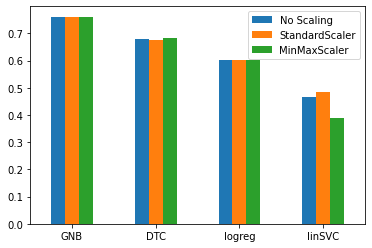

In [54]:
df = pd.DataFrame({'No Scaling': scores_NoScaler,
                   'StandardScaler': scores_StandardScaler,
                     'MinMaxScaler': scores_MinMaxScaler}, index = ['GNB', 'DTC', 'logreg', 'linSVC'])
ax = df.plot.bar(rot=0)